In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually
plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
movies = pd.read_csv("./data/movies_prop_df.csv", index_col=0)
movies.head()

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda
0,10344754,毒战 毒戰,2012,刚刚结束一次危险任务的津海市缉毒大队队长张雷（孙红雷 饰），在医院意外见到因车祸入院治疗的香...,"['剧情', '动作', '犯罪']",210072,10,2,7.5,34235,...,0,0,0,0,0,0,0,0,0,0
1,10355621,粉红女郎之爱人快跑,2013,为了泡到一个男朋友，结婚狂（阿雅 饰）碰见魔术师高明（锦荣 饰）后，便告诉对方自己怀了他的孩...,"['喜剧', '爱情']",1826,10,2,3.2,65,...,0,0,0,0,0,0,0,0,0,0
2,10355633,绝命藏宝图,2012,一对不食人间烟火的青年男女——彭少文和程雪珂狼狈地逃到余姚县城门口，他们身后有一群凶神恶煞的...,"['动作', '悬疑']",78,10,2,3.2,43,...,0,0,0,0,0,0,0,0,0,0
4,10430281,七个隆咚锵咚锵,2012,韩峰（韩兆 饰）在一天之内丢掉了工作和恋人，一无所有的他陷入了人生的低谷之中。然而，韩峰的运...,"['喜剧', '爱情']",506,10,2,4.9,115,...,0,0,0,0,0,0,0,0,0,0
5,10437802,武当少年 武當少年,2010,主人公翔翔原本是一个天真浪漫，活泼好动的孩子，在一次观看武当武校在台湾的表演后，萌生了赴武当...,"['剧情', '儿童']",68,10,2,6.1,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
japan = {
    10508901, 10553094, 10734527, 11589786, 19967789, 19975090, 19976099, 19995496, 19997896, 20458803, 23854117,
    24383498, 24525721, 24854991, 25731086, 25761527, 25789352, 25808721, 25820616, 25874977, 25945369, 26005643,
    26087446, 26316956, 26323542, 26331700, 26363291, 26378587, 26382797, 26389069, 26431412, 26438799, 26578123,
    26605823, 26606018, 26643908, 26754233, 26769474, 26826571, 26827878, 26924066, 26974030, 26990713, 27063335,
    27098619, 30283282, 30419063, 34845733, 34943661, 35123973, 35205446, 35295537, 35309666, 3562446, 35786349,
    3792816, 4134631, 4825006, 4926002, 5045676, 5290697, 6080772, 6080801, 6118717, 6436755, 6436776, 6714125, 6815052, 6835239, 6984061, 26961119
}
# or revolution
kmt = {
    10527199, 10605577, 10746136, 21339522, 21359495, 24383521, 25743807, 26631304, 26822683, 30244759, 30345265,
    30454698, 30463515, 4363034, 5338073, 5343383, 6041191, 6796186, 6801423, 11627081, 30261964, 6519563, 11627074,
    35125443, 27180974, 6714122
}
# propaganda about the CCP or its "hardworking, selfless" officials, post 1949
party = {
    10738246, 11615437, 11627084, 19994974, 25927500, 25934932, 26452381, 26667646, 26769471, 26827508, 27067697,
    27185404, 30291126, 30322432, 30481973, 4896295, 6519575
}
# stories about e.g., police, fireman, pilot, doctor
public_service = {
    10810268, 11627061, 20283521, 20376613, 20426973, 26658847, 26738642, 26898862, 26994736, 27104330, 27175974,
    30185236, 34947776, 35087699, 30221757, 30295905, 11627083
}
# stories about the law, anti crime, drugs
law_and_order = {
    10833850, 20471346, 23115889, 24863241, 25746423, 25845384, 26304157, 26306671, 27086953, 27591144, 30210351,
    34936468, 35164328, 35231414, 35611465, 4891917, 6519574, 30373723, 35172696, 30317706, 30327877
}
# propaganda about upstanding citizens "Leifeng"
role_model = {
    11632451, 11632726, 25931451, 26640841, 26877472, 30293828, 30347930, 34867956, 35061627, 6008428, 6013758
}
# people's lives, harmonious society
societal = {
    26384079, 26815182, 30402752, 34953868, 35051512, 35051512, 35096883, 35294995, 35303777, 35312437
}
# propaganda about the superiority of Chinese people/Chinese culture
cultural = {
    10478122, 10537987, 10573597, 10583890, 19965216, 19977901, 21327647, 24748879, 25980554, 26647899, 26796664,
    26885074, 27040921, 30384234, 32659890, 35411088, 3578981, 4118068, 6041200, 6519585
}
# excessively militarist or foreign antagonist
jingoistic = {
    24530628, 24753810, 24863314, 25815034, 26266924, 26363254, 26616690, 26753020, 26861685, 27102739, 27596992,
    30128916, 34833914, 3778238, 30413195
}
# propaganda about tibet, xinjiang, taiwan etc
diplomatic = {
    10810270, 25886523, 26607132, 26639463, 30175306, 30327768, 32491917, 34845519, 35624863, 4116937, 5045804, 6855101
}
anti_imperialist = {
    24859460, 30207949, 30263962, 30393875, 35067563, 6514079,
}
korean_war = {
    25845392, 25945350, 35155748, 35215390, 35225980, 35231379, 35613853
}
# this is egregious
children = {
    19977815, 19977818, 21323597, 24530508, 25869685, 26598990, 6394372
}

In [4]:
categories = {
    "Japan": japan,
    "Revolution": kmt,
    "Communist Party": party,
    "Public Service": public_service,
    "Law and Order": law_and_order,
    "Role Model": role_model,
    "Society": societal,
    "Culture": cultural,
    "Jingoistic": jingoistic,
    "Diplomatic": diplomatic,
    "Anti-imperialist": anti_imperialist,
    "Korean War": korean_war,
    "Children": children,
}

In [5]:
# sanity check
super_set = set()
count = 0

for c in categories.values():
    for i in c:
        count += 1
        if i in super_set:
            print(i)
        else:
            super_set.add(i)

count

239

In [6]:
movies.dPropaganda.sum()

239

In [7]:
keywords = {
    "中国", "日军", "日本", "抗日", "人民", "英雄", "部队", "民族", "精神", "革命", "牺牲", "国民党", "红军", "中共", "祖国", "犯罪", "解放", "领导", "地下党",
    "警察", "八路军", "主", "日寇", "西藏", "共产党", "同志", "新疆", "毛泽东", "爱国", }

In [8]:
with open("./data/details_dict.pkl", "rb") as f:
    details_dict = pickle.load(f)

In [78]:
# write to nice html file
with open("./categories.html", "w", encoding="utf-8") as f:
    f.write("<style>"
            "body { font-family: sans-serif; white-space: pre-line; max-width:900px; margin: auto }"
            "</style>")
    f.write("<h1>Propaganda Movies by Categories</h1>")
    for k in categories:
        f.write(f"<a href='#{k}'>{k}</a><br>")

with open("./categories.html", "a", encoding="utf-8") as f:
    for k, v in categories.items():
        f.write(f"<br><h1 id='{k}'>{k}</h1><br>")
        for index, row in movies[movies.id.isin(v)].iterrows():
            f.write(f'<img src="{details_dict[str(row.id)]["image"]}">')
            f.write(f"<p>https://movie.douban.com/subject/{row.id}/</p>")
            f.write(f"<h2>{row['name']} ({row.year})</h2>")
            f.write(f"<h3>{row.genre}</h3>")
            f.write(f"<h3>Rating: {row.ratingValue}, count: {row.ratingCount}</h3>")
            desc = row.description
            for k in keywords:
                desc = desc.replace(k, "<mark>" + k + "</mark>")
            f.write(f"<p>{desc}</p>")
            f.write("<hr>")

<AxesSubplot:>

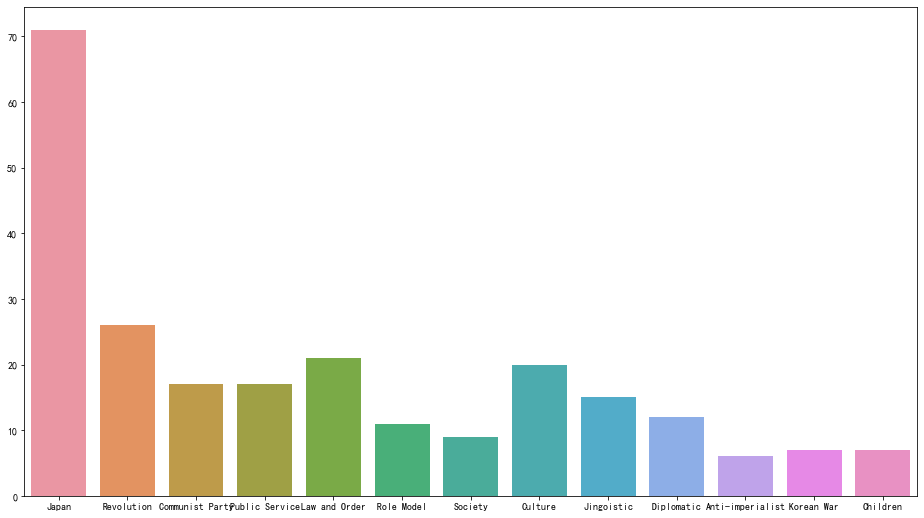

In [30]:
categories_freq = pd.Series({k: len(v) for k, v in categories.items()})
sns.barplot(x=categories_freq.index, y=categories_freq)

In [7]:
movies.drop(columns="dPropaganda", inplace=True)

In [8]:
# build category dummies
for cat_name, cat in categories.items():
    dummies = []
    for i in movies.id:
        dummies.append(1 if i in cat else 0)
    movies.insert(len(movies.columns), f"c{cat_name.replace('-', ' ').split(' ')[0]}", dummies)

movies.head()

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,cPublic,cLaw,cRole,cSociety,cCulture,cJingoistic,cDiplomatic,cAnti,cKorean,cChildren
0,10344754,毒战 毒戰,2012,刚刚结束一次危险任务的津海市缉毒大队队长张雷（孙红雷 饰），在医院意外见到因车祸入院治疗的香...,"['剧情', '动作', '犯罪']",210072,10,2,7.5,34235,...,0,0,0,0,0,0,0,0,0,0
1,10355621,粉红女郎之爱人快跑,2013,为了泡到一个男朋友，结婚狂（阿雅 饰）碰见魔术师高明（锦荣 饰）后，便告诉对方自己怀了他的孩...,"['喜剧', '爱情']",1826,10,2,3.2,65,...,0,0,0,0,0,0,0,0,0,0
2,10355633,绝命藏宝图,2012,一对不食人间烟火的青年男女——彭少文和程雪珂狼狈地逃到余姚县城门口，他们身后有一群凶神恶煞的...,"['动作', '悬疑']",78,10,2,3.2,43,...,0,0,0,0,0,0,0,0,0,0
4,10430281,七个隆咚锵咚锵,2012,韩峰（韩兆 饰）在一天之内丢掉了工作和恋人，一无所有的他陷入了人生的低谷之中。然而，韩峰的运...,"['喜剧', '爱情']",506,10,2,4.9,115,...,0,0,0,0,0,0,0,0,0,0
5,10437802,武当少年 武當少年,2010,主人公翔翔原本是一个天真浪漫，活泼好动的孩子，在一次观看武当武校在台湾的表演后，萌生了赴武当...,"['剧情', '儿童']",68,10,2,6.1,2,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# DV trap
movies.drop(columns=["cAnti", ], inplace=True)

In [10]:
movies.to_csv("./data/movies_cat_df.csv")